# Imports

In [33]:
import torch
import torch.optim as optim
import numpy as np
import node_models
import loader
import training
import metrics
import autotune
import config

# GPU

In [2]:
device = torch.device(1)

# Data Loading

In [3]:
cifar_data_path = './cifar-10-batches-py'

In [4]:
cifar_data = loader.CIFAR(cifar_data_path, 3)
cifar_splits = cifar_data.splits

In [5]:
print("CIFAR STATS")
print("Number of splits:", len(cifar_splits))
print("Number of segments per split (train, val, test):", len(cifar_splits[0]))
print("Info per segment (data, labels):", len(cifar_splits[0][0]))
print("Size of segement (num examples):", len(cifar_splits[0][0][0]))

CIFAR STATS
Number of splits: 3
Number of segments per split (train, val, test): 3
Info per segment (data, labels): 2
Size of segement (num examples): 33334


# Model & Optimizer

In [6]:
model = node_models.NeuralODE
optimizer = optim.Adam

# Training and Evaluation

## CIFAR

### NODE

In [7]:
model_params = config.baseline_config_cifar_node['model']
lr, epochs, batch, workers = config.baseline_config_cifar_node['train']

In [8]:
node_cifar_trainer = training.Trainer(model, optimizer, cifar_data, device)

In [9]:
node_cifar_trainer.train(model_params, lr, epochs, batch, num_workers=12, verbose=True, num_loss=3)

[1,   347] loss: 9.45389
[1,   694] loss: 1.87745
[1,  1041] loss: 1.71557
[Fold 1] Epoch:1 Training Acc:0.3281934361312774
[Fold 1] Epoch:1 Validation Acc:0.41569662786511463
[2,   347] loss: 1.58219
[2,   694] loss: 1.56712
[2,  1041] loss: 1.51496
[Fold 1] Epoch:2 Training Acc:0.44384112317753643
[Fold 1] Epoch:2 Validation Acc:0.43645745829833194
[3,   347] loss: 1.43146
[3,   694] loss: 1.42832
[3,  1041] loss: 1.41765
[Fold 1] Epoch:3 Training Acc:0.4909701805963881
[Fold 1] Epoch:3 Validation Acc:0.4713788551542062
[4,   347] loss: 1.31422
[4,   694] loss: 1.33816
[4,  1041] loss: 1.31784
[Fold 1] Epoch:4 Training Acc:0.5279294414111718
[Fold 1] Epoch:4 Validation Acc:0.5096603864154566
[5,   347] loss: 1.19593
[5,   694] loss: 1.23824
[5,  1041] loss: 1.24455
[Fold 1] Epoch:5 Training Acc:0.5659086818263634
[Fold 1] Epoch:5 Validation Acc:0.5354614184567382
[6,   347] loss: 1.11922
[6,   694] loss: 1.16937
[6,  1041] loss: 1.16499
[Fold 1] Epoch:6 Training Acc:0.591018179636407

In [10]:
node_cifar_trainer.test(model_params, 10, 3)

[Fold: 1] Testing Acc: 0.5437417496699868
[Fold: 2] Testing Acc: 0.5120604824192968
[Fold: 3] Testing Acc: 0.5066586682663468


In [14]:
 torch.cuda.empty_cache()

### ANODE

In [25]:
model_params = config.baseline_config_cifar_anode['model']
lr, epochs, batch, workers = config.baseline_config_cifar_anode['train']

In [26]:
anode_cifar_trainer = training.Trainer(model, optimizer, cifar_data, device)

In [27]:
anode_cifar_trainer.train(model_params, lr, epochs, batch, num_workers=12, verbose=True, num_loss=3)

[1,   347] loss: 74.22584
[1,   694] loss: 5.75366
[1,  1041] loss: 2.80304
[Fold 1] Epoch:1 Training Acc:0.30506389872202555
[Fold 1] Epoch:1 Validation Acc:0.36793471738869554
[2,   347] loss: 1.66654
[2,   694] loss: 1.53361
[2,  1041] loss: 1.44040
[Fold 1] Epoch:2 Training Acc:0.47876042479150416
[Fold 1] Epoch:2 Validation Acc:0.47401896075843036
[3,   347] loss: 1.19077
[3,   694] loss: 1.27396
[3,  1041] loss: 1.29088
[Fold 1] Epoch:3 Training Acc:0.5708885822283555
[Fold 1] Epoch:3 Validation Acc:0.5225009000360015
[4,   347] loss: 1.04269
[4,   694] loss: 1.14217
[4,  1041] loss: 1.19150
[Fold 1] Epoch:4 Training Acc:0.6152876942461151
[Fold 1] Epoch:4 Validation Acc:0.5358214328573143
[5,   347] loss: 0.95289
[5,   694] loss: 1.09083
[5,  1041] loss: 1.12861
[Fold 1] Epoch:5 Training Acc:0.6414171716565669
[Fold 1] Epoch:5 Validation Acc:0.546141845673827
[6,   347] loss: 0.81021
[6,   694] loss: 0.93469
[6,  1041] loss: 1.07638
[Fold 1] Epoch:6 Training Acc:0.68422631547369

In [28]:
anode_cifar_trainer.test(model_params, 10, 3)

[Fold: 1] Testing Acc: 0.5334213368534741
[Fold: 2] Testing Acc: 0.5207008280331213
[Fold: 3] Testing Acc: 0.5302939412117577


In [38]:
print(anode_cifar_trainer.val_metrics['loss'])

{'fold2': [0.060628909445547136, 0.04912606976433675, 0.04798959227980478, 0.04491099626895232, 0.04885892389230649, 0.05267452773792638, 0.05245044754859881, 0.06020561529782358, 0.06292828509433636, 0.06495151837504698], 'fold1': [0.06735657558397673, 0.04859225384888351, 0.04492936035056911, 0.043722554148995944, 0.04750748108690217, 0.06033040852617076, 0.04979965679073025, 0.054485801959200865, 0.06163176544771523, 0.06266300270254982], 'fold3': [0.07367163387993497, 0.052990717760843915, 0.048391272472931846, 0.04650049623458251, 0.05733130373875233, 0.0525236081049878, 0.05350294407713274, 0.057034276197841585, 0.060662169559769, 0.06517506346015331]}


# Plots

In [31]:
node_cifar_trainer.val_metrics['legend'] = 'NODE'
anode_cifar_trainer.val_metrics['legend'] = 'ANODE'
out_metrics = [node_cifar_trainer.val_metrics, anode_cifar_trainer.val_metrics]

In [34]:
plt = metrics.Plotter(out_metrics)

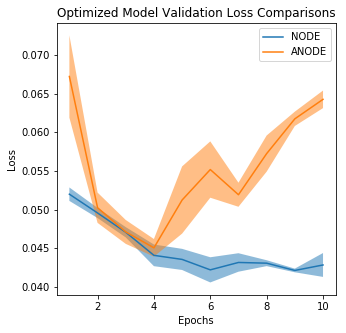

In [35]:
plt.plotLoss("Optimized Model Validation Loss Comparisons")

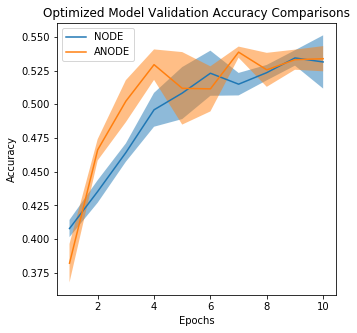

In [36]:
plt.plotAccuracy("Optimized Model Validation Accuracy Comparisons")